## More on data structures

#### Iterable vs. Iterators

Lists are examples of iterable data structures, which means that you can iterate over the actual objects in these data structures.

In [1]:
# iterating over a list by object

x = ['bob', 'sue', 'mary']

for name in x: 
    print(name.upper() + ' WAS HERE')

BOB WAS HERE
SUE WAS HERE
MARY WAS HERE


In [2]:
# alternatively, you could iterate over position

for i in range(len(x)):
    print(x[i].upper() + ' WAS HERE')

BOB WAS HERE
SUE WAS HERE
MARY WAS HERE


In [3]:
dir(x)  # ignore the __ methods for now

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

generators return their contents 'lazily'. This leaves a minimal memory footprint, at the cost of making the generator nonreusable.

In [13]:
y = (x*x for x in [1, 2, 3])

In [5]:
type(y)

generator

In [6]:
dir(y)

['__class__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__next__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'close',
 'gi_code',
 'gi_frame',
 'gi_running',
 'gi_yieldfrom',
 'send',
 'throw']

In [7]:
y.send??

In [8]:
y[5]

TypeError: 'generator' object is not subscriptable

In [15]:
next(y)

1

In [16]:
y.send(1)

4

In [18]:
next(y)  # run this cell twice - what happens?

StopIteration: 

'range' is something like a generator, but with special properties because of its intended use case (in 'for' loops or similar structures.

In [19]:
z = range(10, 5, -1)

In [20]:
dir(range)

['__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index',
 'start',
 'step',
 'stop']

In [21]:
# let's filter that list a little
[x for x in dir(range) if not x.startswith('_')]

['count', 'index', 'start', 'step', 'stop']

In [22]:
z.start

10

In [23]:
len(z)  # __ function - overloaded operator

5

From the docs (https://docs.python.org/3/library/stdtypes.html#typesseq-range): The advantage of the range type over a regular list or tuple is that a range object will always take the same (small) amount of memory, no matter the size of the range it represents (as it only stores the start, stop and step values, calculating individual items and subranges as needed).

Range objects implement the collections.abc.Sequence ABC, and provide features such as containment tests, element index lookup, slicing and support for negative indices (see Sequence Types — list, tuple, range):

In [24]:
for i in z:
    print(i)

10
9
8
7
6


zips produced iterators from pairs: 

In [25]:
GPA = zip(['bob', 'sue', 'mary'], [2.3, 4.0, 3.7])

In [26]:
type(GPA)

zip

In [27]:
dir(GPA)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [28]:
next(GPA)

('bob', 2.3)

In [29]:
next(GPA)[1]

4.0

## More on Dicts

The dict data structure shows up all over Python.

In [30]:
dict?

from assignment:

In [31]:
GPA_2 = dict(bob=2.0, sue=3.4, mary=4.0)

from iterator:

In [32]:
names = ['bob', 'mary', 'sue', 'lisa']
gpas = [3.2, 4.0, 3.1, 2.8]

GPA_3 = dict(zip(names, gpas))
GPA_3

{'bob': 3.2, 'lisa': 2.8, 'mary': 4.0, 'sue': 3.1}

In function definitions:

In [33]:
# explicitly named arguments are also positional
# Anything after * in a function is a positional argument - tuple
# Anything after ** is a named argument 
# the latter are unpacked as dicts

def arg_explainer(x, y, *args, **kwargs):
    print('-'*30)
    print('x is %d, even though you didn\'t specify it, because of its position.' % x)
    print('same with y, which is %d.' %y)
    if args:
        print('-'*30)
        print('type(*args) = %s' % type(args))
        print('these are the *args arguments: ')
        for arg in args:
            print(arg)
    else:
        print('-'*30)
        print('no *args today!')
    if kwargs:
        print('-'*30)
        print('type(**kwargs) == %s' % type(kwargs))
        for key in kwargs:
            print(key, kwargs[key])
    else:
        print('-'*30)
        print('no **kwargs today!')
        print('-'*30)

In [35]:
arg_explainer(2, 4, 3, 7, 8, 9, 10, plot=True, sharey=True, rotate=False)

------------------------------
x is 2, even though you didn't specify it, because of its position.
same with y, which is 4.
------------------------------
type(*args) = <class 'tuple'>
these are the *args arguments: 
3
7
8
9
10
------------------------------
type(**kwargs) == <class 'dict'>
rotate False
sharey True
plot True


In function calls:

In [36]:
my_kwargs = {'plot': False, 'sharey': True}

arg_explainer(1, 2, **my_kwargs)

------------------------------
x is 1, even though you didn't specify it, because of its position.
same with y, which is 2.
------------------------------
no *args today!
------------------------------
type(**kwargs) == <class 'dict'>
sharey True
plot False


This allows, for instance, matplotlibs plot function to accept a huge range of different plotting options, or few to none at all.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

?plt.plot

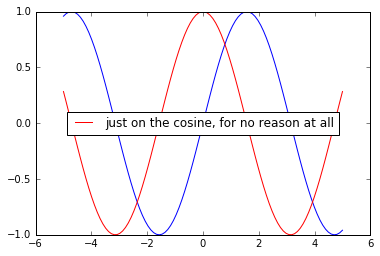

In [38]:
x = np.linspace(-5, 5, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1)  # all of these arguments are *args
plt.plot(x, y2, color='red', label='just on the cosine, for no reason at all')  # starting w/ color, **kwargs
plt.legend(loc='center');